***Diabetes Classification using a Binary Logistic Regression Model***

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Preprocessing**

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,neg
1,0,137,40,35,168,43.1,2.288,33,pos
2,3,78,50,32,88,31.0,0.248,26,pos
3,2,197,70,45,543,30.5,0.158,53,pos
4,1,189,60,23,846,30.1,0.398,59,pos


In [3]:
diabetes.tail()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
387,0,181,88,44,510,43.3,0.222,26,pos
388,1,128,88,39,110,36.5,1.057,37,pos
389,2,88,58,26,16,28.4,0.766,22,neg
390,10,101,76,48,180,32.9,0.171,63,neg
391,5,121,72,23,112,26.2,0.245,30,neg


In [4]:
diabetes.shape

(392, 9)

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  392 non-null    int64  
 1   glucose   392 non-null    int64  
 2   pressure  392 non-null    int64  
 3   triceps   392 non-null    int64  
 4   insulin   392 non-null    int64  
 5   mass      392 non-null    float64
 6   pedigree  392 non-null    float64
 7   age       392 non-null    int64  
 8   diabetes  392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


**Mapping Neg: 0 and Pos: 1**

In [6]:
diabetes["diabetes"] = diabetes["diabetes"].map({"neg":0, "pos":1})
diabetes.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1


In [7]:
diabetes.tail()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
387,0,181,88,44,510,43.3,0.222,26,1
388,1,128,88,39,110,36.5,1.057,37,1
389,2,88,58,26,16,28.4,0.766,22,0
390,10,101,76,48,180,32.9,0.171,63,0
391,5,121,72,23,112,26.2,0.245,30,0


**Dataset Information**

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  392 non-null    int64  
 1   glucose   392 non-null    int64  
 2   pressure  392 non-null    int64  
 3   triceps   392 non-null    int64  
 4   insulin   392 non-null    int64  
 5   mass      392 non-null    float64
 6   pedigree  392 non-null    float64
 7   age       392 non-null    int64  
 8   diabetes  392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.7 KB


In [9]:
diabetes.describe()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

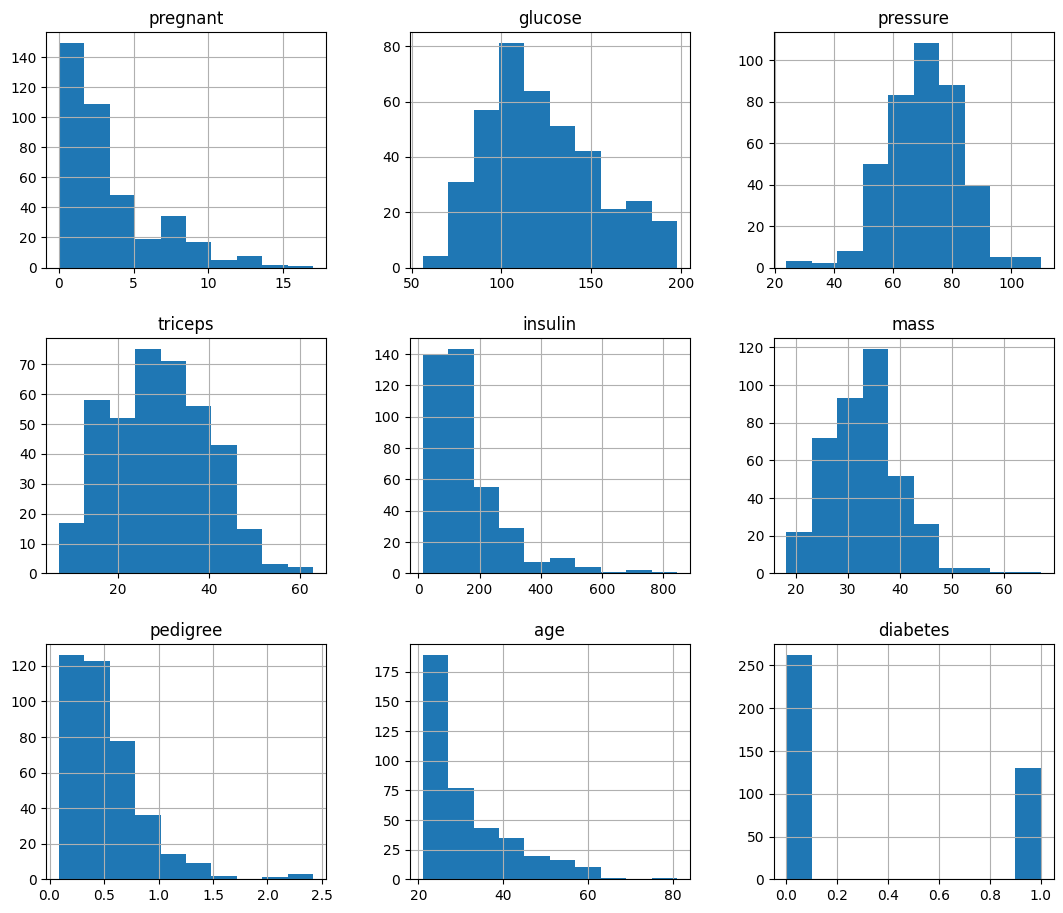

In [10]:
diabetes.hist(figsize=(13,11))
plt.show

<Axes: >

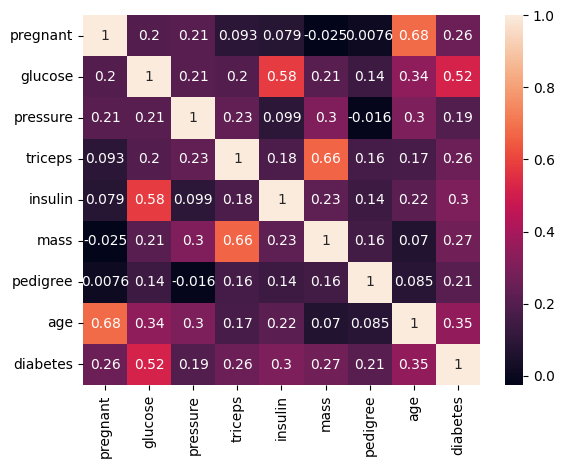

In [11]:
corl_map = diabetes.corr()
sns.heatmap(corl_map,annot = True)

**Extracting Dependent and Independent Values**

In [12]:
x = diabetes.values[:,0:8]
y = diabetes.values[:,8]
x,y

(array([[  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
        [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
        [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
        ...,
        [  2.   ,  88.   ,  58.   , ...,  28.4  ,   0.766,  22.   ],
        [ 10.   , 101.   ,  76.   , ...,  32.9  ,   0.171,  63.   ],
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ]]),
 array([0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0.,

**Splitting the Dataset into Training and Test Data**

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
test_size = 0.20
print(x_train)

[[  5.     86.     68.    ...  30.2     0.364  24.   ]
 [  3.    173.     78.    ...  33.8     0.97   31.   ]
 [  1.    128.     88.    ...  36.5     1.057  37.   ]
 ...
 [  2.    100.     66.    ...  32.9     0.867  28.   ]
 [  3.    173.     82.    ...  38.4     2.137  25.   ]
 [  3.    123.    100.    ...  57.3     0.88   22.   ]]


**Fitting Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings('ignore')

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

**Model Evaluation on Test Dataset**

In [15]:
predictions = model.predict(x_test)
print(predictions)

[1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0.]


Confusion Matrix
[[65  6]
 [12 15]]


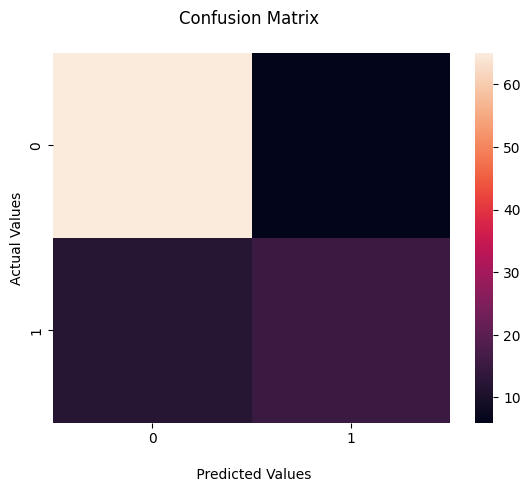

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

ax = sns.heatmap(confusion_matrix(y_test,predictions))
ax.set(title='Confusion Matrix \n',xlabel='\n Predicted Values', ylabel='Actual Values');

**Classification Accuracy**

In [17]:
accuracy = accuracy_score(y_test, predictions)*100
print("accuracy of the model is {:,.2f}".format(accuracy))

accuracy of the model is 81.63


**Classification Report**

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        71
         1.0       0.71      0.56      0.63        27

    accuracy                           0.82        98
   macro avg       0.78      0.74      0.75        98
weighted avg       0.81      0.82      0.81        98



**Predicting Diabetes**

In [19]:
model.predict([[2,88,58,26,16,28.4,0.766,22]])

array([0.])